<a href="https://colab.research.google.com/github/MUHAMMADALYAN/Convolution-Neural-Network-with-tensor-flow/blob/master/Men_vs_Women.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
files.upload()



Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadalyan","key":"69c3e21a334269c341d9ac3248f3af35"}'}

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d playlist/men-women-classification

 99% 1.18G/1.19G [00:50<00:00, 27.7MB/s]
100% 1.19G/1.19G [00:50<00:00, 25.3MB/s]


In [ ]:
import os
import zipfile

local_file='/content/men-women-classification.zip'
zip_ref=zipfile.ZipFile(local_file,'r')
zip_ref.extractall()
zip_ref.close()

men_dir=os.path.join('/content/men')
women_dir=os.path.join('/content/women')
print('total training men images:', len(os.listdir(men_dir)))
print('total training women images:', len(os.listdir(women_dir)))

import os

paths=[
       '/content/menvswomen',
       '/content/menvswomen/training',
       '/content/menvswomen/testing',
       '/content/menvswomen/training/men',
       '/content/menvswomen/training/women',
       '/content/menvswomen/testing/men',
       '/content/menvswomen/testing/women'
]

for i in paths:
  os.mkdir(i)
  print("Created")
  

total training men images: 1418
total training women images: 1912
Created
Created
Created
Created
Created
Created
Created


In [ ]:
import shutil
from shutil import copyfile

def m_spliting_data(source_dir,split_point,training_dst,testing_dst):
  list=os.listdir(source_dir)
  split_data=int(len(list)*split_point)
  training_data=list[:split_data]
  testing_data=list[split_data:]
  for i in training_data:
    src=source_dir+i
    copyfile(src,training_dst+i)
  for i in testing_data:
    src=source_dir+i
    copyfile(src,testing_dst+i)

def w_spliting_data(source_dir,split_point,training_dst,testing_dst):
  list=os.listdir(source_dir)
  split_data=int(1418*split_point)
  training_data=list[:split_data]
  testing_data=list[split_data:1418]
  for i in training_data:
    src=source_dir+i
    copyfile(src,training_dst+i)
  for i in testing_data:
    src=source_dir+i
    copyfile(src,testing_dst+i)

split_point=0.95
men_source='/content/data/men/'
men_training_dst='/content/menvswomen/training/men/'
men_testing_dst='/content/menvswomen/testing/men/'
women_source='/content/data/women/'
women_training_dst='/content/menvswomen/training/women/'
women_testing_dst='/content/menvswomen/testing/women/'

m_spliting_data(men_source,split_point,men_training_dst,men_testing_dst)
w_spliting_data(women_source,split_point,women_training_dst,women_testing_dst)

In [ ]:
md=os.path.join('/content/menvswomen/training/men')
wd=os.path.join('/content/menvswomen/training/women')
print('total training men images:', len(os.listdir(md)))
print('total training women images:', len(os.listdir(wd)))


total training men images: 1347
total training women images: 1347


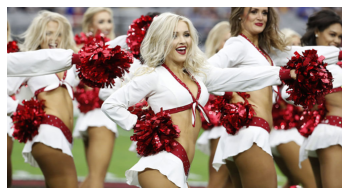

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
women_list=os.listdir(women_training_dst)
img_path = os.path.join(women_dir,women_list[156])
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('Off')
plt.show()


In [ ]:
import tensorflow as tf
import keras_preprocessing 
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

training_dir="/content/menvswomen/training"
training_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


train_generator=training_datagen.flow_from_directory(
    training_dir,
    target_size=(150,150),
    class_mode='binary',
    batch_size=32
)

VALIDATION_DIR = '/content/menvswomen/testing'#YOUR CODE HERE
validation_datagen = ImageDataGenerator( rescale = 1.0/255. )
#YOUR CODE HERE

# NOTE: YOU MUST USE A BACTH SIZE OF 10 (batch_size=10) FOR THE 
# VALIDATION GENERATOR
validation_generator =  validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                         batch_size=32,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150)) #YOUR CODE HERE





Found 2679 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [ ]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.65),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation="sigmoid",kernel_regularizer=tf.keras.regularizers.L2(0.003))])

best_model=tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/My Drive/Colab Notebooks/save_weights',
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True)



model.compile(optimizer = 'Adam'   ,loss = tf.keras.losses.BinaryCrossentropy(),metrics = ['accuracy'])
histary=model.fit(train_generator,epochs=100,verbose=1,steps_per_epoch =  84,
                              validation_data=validation_generator,callbacks=best_model)


Epoch 1/100
84/84 [==============================] - ETA: 0s - loss: 0.7010 - accuracy: 0.4905WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/tracking/tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/save_weights/assets
84/84 [==============================] - 63s 748ms/step - loss: 0.7010 - accuracy: 0.4905 - val_loss: 0.6984 - val_accuracy: 0.5000
Epoch 2/100
84/84 [==============================] - 63s 746ms/step - loss: 0.6969 - accuracy: 0.5032 - val_loss: 0.6947 - val_accuracy: 0.5071
Epoch 3/100
84/84 [==============================] - 61s 728ms/

In [ ]:
model.save('/content/drive/My Drive/Colab Notebooks/saved_best')

INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/saved_best/assets


In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation="sigmoid",kernel_regularizer=tf.keras.regularizers.L2(0.003))])

best_model=tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/My Drive/Colab Notebooks/saved_best',
    save_weights_only=False,
    monitor='val_acc',
    mode='max',
    save_best_only=True)
model.compile(optimizer = 'Adam'  ,loss = tf.keras.losses.BinaryCrossentropy(),metrics = ['accuracy'])
histary=model.fit(train_generator,epochs=150,verbose=1,steps_per_epoch =  84,
                              validation_data=validation_generator,callbacks=best_model)


In [ ]:
from tensorflow.keras.models import load_model
model = load_model("/content/drive/My Drive/Colab Notebooks/saved_best")

In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image


uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  x=image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  
  images = np.vstack([x])
  result=model.predict(images)
  
  print(result)
  

Saving m1.jpg to m1 (4).jpg
Saving m2.jpg to m2 (3).jpg
Saving m5.jpg to m5 (4).jpg
Saving m6.jpg to m6 (3).jpg
Saving m12.jpg to m12 (2).jpg
Saving m13.jpg to m13 (2).jpg
Saving w1.jpg to w1 (2).jpg
Saving w2.jpg to w2 (2).jpg
Saving w3.jpg to w3 (1).jpg
Saving w4.jpg to w4 (2).jpg
Saving w5.jpg to w5 (1).jpg
Saving w6.jpg to w6 (1).jpg
Saving w7.jpg to w7 (2).jpg
Saving w8.jpg to w8 (2).jpg
Saving w9.jpg to w9 (1).jpg
Saving w10.jpeg to w10 (1).jpeg
Saving w11.jpg to w11 (1).jpg
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[2.0804207e-31]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]


In [ ]:
from tensorflow.keras.models import load_model
model = load_model("/content/drive/My Drive/Colab Notebooks/save_weights")

In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image


uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  x=image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  
  images = np.vstack([x])
  result=model.predict(images)
  
  print(result)
  

Saving m1.jpg to m1 (5).jpg
Saving m2.jpg to m2 (4).jpg
Saving m5.jpg to m5 (5).jpg
Saving m6.jpg to m6 (4).jpg
Saving m12.jpg to m12 (3).jpg
Saving m13.jpg to m13 (3).jpg
Saving w1.jpg to w1 (3).jpg
Saving w2.jpg to w2 (3).jpg
Saving w3.jpg to w3 (2).jpg
Saving w4.jpg to w4 (3).jpg
Saving w5.jpg to w5 (2).jpg
Saving w6.jpg to w6 (2).jpg
Saving w7.jpg to w7 (3).jpg
Saving w8.jpg to w8 (3).jpg
Saving w9.jpg to w9 (2).jpg
Saving w10.jpeg to w10 (2).jpeg
Saving w11.jpg to w11 (2).jpg
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[0.]]
[[2.0804207e-31]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]


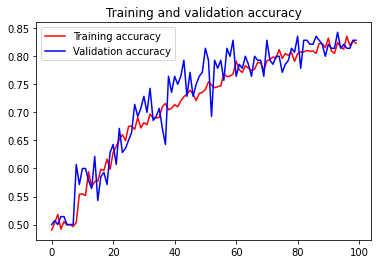

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = histary.history['accuracy']
val_acc = histary.history['val_accuracy']
loss = histary.history['loss']
val_loss = histary.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image


uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  x=image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  
  images = np.vstack([x])
  result=model.predict(images)
  
  print(result)
  

Saving m1.jpg to m1 (2).jpg
Saving m2.jpg to m2 (1).jpg
Saving m5.jpg to m5 (2).jpg
Saving m6.jpg to m6 (2).jpg
Saving m12.jpg to m12 (1).jpg
Saving m13.jpg to m13 (1).jpg
Saving w1.jpg to w1 (1).jpg
Saving w2.jpg to w2 (1).jpg
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]


In [ ]:
from keras.preprocessing import image
path='/content/menvswomen/testing/men/00000309.jpg'
img=image.load_img(path, target_size=(150, 150))
  
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
result=model.predict(x)
print(result)